# Import Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,recall_score,precision_score,confusion_matrix
import numpy as np
import ctypes
import warnings
warnings.filterwarnings('ignore')

# Import Data

In [2]:
forest_data = pd.read_csv('forestfires.csv')
forest_data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


# Data Understanding

In [3]:
forest_data.shape

(517, 31)

In [4]:
forest_data.dtypes

month             object
day               object
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category     object
dtype: object

In [5]:
forest_data.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

# Data Preparation

In [6]:
pd.set_option('max_columns',None)

In [7]:
forest_data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small


### Since month and days are already present in encoded form in giver data so we can drop the month and day feature as it conveys the same information

In [8]:
forest_data.drop(labels=['month','day'],axis=1,inplace=True)

In [9]:
forest_data

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small


In [10]:
forest_data.shape

(517, 29)

In [11]:
forest_data.dtypes

FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category     object
dtype: object

In [12]:
le = LabelEncoder()

In [13]:
forest_data['size_category'] = le.fit_transform(forest_data['size_category'])

In [14]:
forest_data

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [15]:
forest_data.dtypes

FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category      int32
dtype: object

In [16]:
corr_matrix = forest_data.corr().round(2)
corr_matrix

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
FFMC,1.00,0.38,0.33,0.53,0.43,-0.30,-0.03,0.06,0.04,0.02,-0.06,-0.02,-0.09,0.07,0.01,0.09,-0.12,0.23,-0.14,-0.28,-0.45,0.03,-0.04,-0.07,-0.04,-0.09,-0.01,0.08,-0.02
DMC,0.38,1.00,0.68,0.31,0.47,0.07,-0.11,0.07,0.07,-0.01,-0.11,-0.00,0.03,0.09,0.00,0.02,-0.20,0.50,-0.18,-0.32,-0.11,-0.00,-0.05,-0.41,-0.08,-0.07,-0.19,0.11,-0.03
DC,0.33,0.68,1.00,0.23,0.50,-0.04,-0.20,0.04,0.05,-0.00,-0.05,-0.04,-0.00,0.05,0.03,0.02,-0.27,0.28,-0.11,-0.40,-0.12,-0.10,-0.19,-0.65,-0.11,-0.08,0.09,0.53,-0.02
ISI,0.53,0.31,0.23,1.00,0.39,-0.13,0.11,0.07,0.01,0.05,-0.16,-0.04,-0.00,-0.02,0.07,0.13,-0.11,0.33,-0.16,-0.25,-0.10,0.02,0.11,-0.14,-0.06,-0.08,-0.07,-0.07,0.01
temp,0.43,0.47,0.50,0.39,1.00,-0.53,-0.23,0.07,0.10,-0.07,-0.14,0.03,0.01,0.05,0.04,0.09,-0.16,0.35,-0.33,-0.32,-0.15,0.14,0.05,-0.34,-0.05,-0.05,-0.05,0.09,-0.01
RH,-0.30,0.07,-0.04,-0.13,-0.53,1.00,0.07,0.10,-0.08,0.06,0.01,-0.02,0.14,-0.12,-0.01,-0.09,0.02,0.05,-0.05,0.14,0.17,0.01,0.01,-0.09,0.09,-0.04,-0.07,-0.06,0.05
wind,-0.03,-0.11,-0.20,0.11,-0.23,0.07,1.00,0.06,0.01,0.12,-0.06,-0.06,0.03,-0.06,0.05,-0.02,0.05,0.03,0.27,-0.03,-0.07,-0.04,0.01,0.18,0.02,0.01,-0.05,-0.18,-0.06
rain,0.06,0.07,0.04,0.07,0.07,0.10,0.06,1.00,-0.01,-0.00,-0.03,-0.03,-0.02,-0.03,0.14,-0.02,-0.01,0.09,-0.01,-0.01,-0.00,-0.01,-0.01,-0.02,-0.00,-0.00,-0.01,-0.05,-0.05
area,0.04,0.07,0.05,0.01,0.10,-0.08,0.01,-0.01,1.00,-0.05,-0.02,0.09,-0.02,0.02,-0.00,-0.01,-0.01,-0.00,0.00,-0.02,-0.01,0.01,-0.02,-0.05,0.01,-0.01,-0.02,0.06,-0.31
dayfri,0.02,-0.01,-0.00,0.05,-0.07,0.06,0.12,-0.00,-0.05,1.00,-0.18,-0.20,-0.21,-0.16,-0.17,-0.15,-0.02,-0.10,-0.02,0.05,-0.03,-0.05,0.01,0.04,0.06,-0.02,-0.05,0.11,0.02


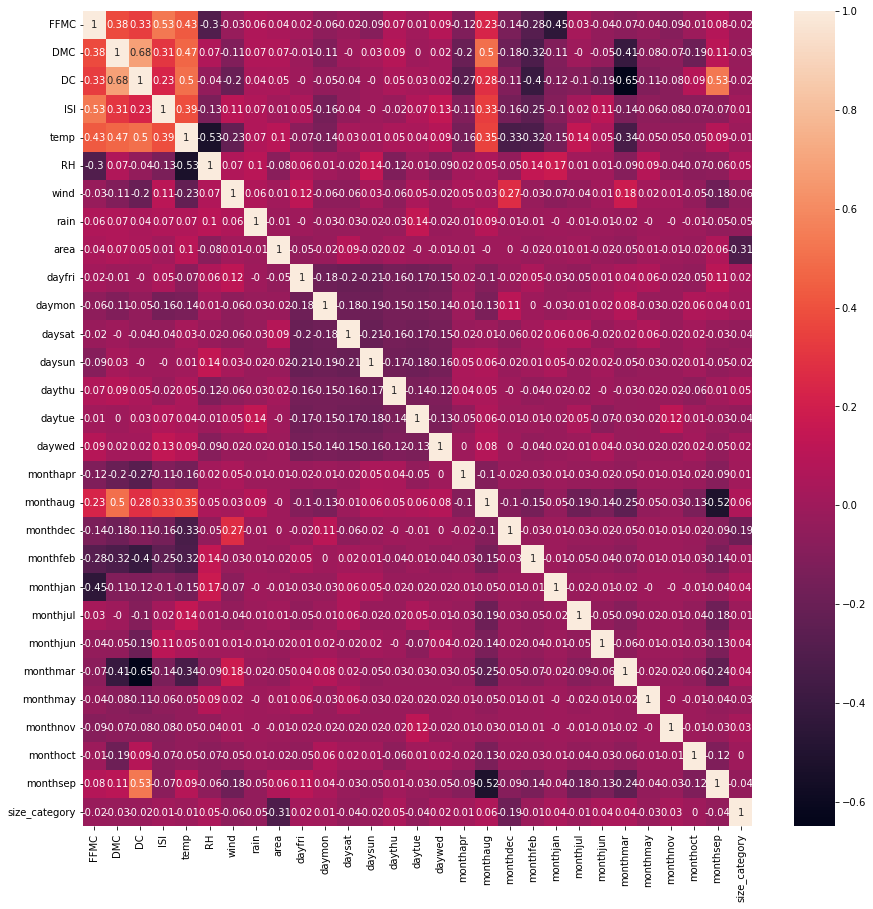

In [17]:
plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix,annot=True)
plt.show()

# Model Building

In [20]:
X = forest_data.drop(labels='size_category',axis=1) 
y = forest_data[['size_category']]

In [21]:
std_scaler = StandardScaler()
X_scaled = std_scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled,columns=X.columns)
X_scaled

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.202020,2.254407,-0.408709,-0.440449,-0.474467,-0.365748,-0.375873,-0.341512,-0.133103,-0.743339,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,2.928152,-0.062318,-0.044023,-0.172860,-0.706081
1,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.202020,-0.443576,-0.408709,-0.440449,-0.474467,-0.365748,2.660475,-0.341512,-0.133103,-0.743339,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,-0.341512,-0.062318,-0.044023,5.785038,-0.706081
2,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.202020,-0.443576,-0.408709,2.270410,-0.474467,-0.365748,-0.375873,-0.341512,-0.133103,-0.743339,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,-0.341512,-0.062318,-0.044023,5.785038,-0.706081
3,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,-0.202020,2.254407,-0.408709,-0.440449,-0.474467,-0.365748,-0.375873,-0.341512,-0.133103,-0.743339,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,2.928152,-0.062318,-0.044023,-0.172860,-0.706081
4,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,-0.202020,-0.443576,-0.408709,-0.440449,2.107630,-0.365748,-0.375873,-0.341512,-0.133103,-0.743339,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,2.928152,-0.062318,-0.044023,-0.172860,-0.706081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,-1.640083,-0.846648,0.474768,-1.563460,1.536084,-0.753800,-0.736124,-0.073268,-0.100753,-0.443576,-0.408709,-0.440449,2.107630,-0.365748,-0.375873,-0.341512,-0.133103,1.345282,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,-0.341512,-0.062318,-0.044023,-0.172860,-0.706081
513,-1.640083,-0.846648,0.474768,-1.563460,0.519019,1.638592,0.995798,-0.073268,0.651674,-0.443576,-0.408709,-0.440449,2.107630,-0.365748,-0.375873,-0.341512,-0.133103,1.345282,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,-0.341512,-0.062318,-0.044023,-0.172860,-0.706081
514,-1.640083,-0.846648,0.474768,-1.563460,0.398350,1.577248,1.498614,-0.073268,-0.026532,-0.443576,-0.408709,-0.440449,2.107630,-0.365748,-0.375873,-0.341512,-0.133103,1.345282,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,-0.341512,-0.062318,-0.044023,-0.172860,-0.706081
515,0.680957,0.549003,0.269382,0.500176,1.156839,-0.140366,-0.009834,-0.073268,-0.202020,-0.443576,-0.408709,2.270410,-0.474467,-0.365748,-0.375873,-0.341512,-0.133103,1.345282,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,-0.341512,-0.062318,-0.044023,-0.172860,-0.706081


In [22]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,random_state=12,stratify=y,test_size=0.20)

In [23]:
X_train.shape,y_train.shape

((413, 28), (413, 1))

In [24]:
X_test.shape,y_test.shape

((104, 28), (104, 1))

# Model Training | Model Testing | Model Evaluation

In [25]:
def generate_clf(input_kernel,input_gamma, input_C=1):
    classifier = SVC(kernel=input_kernel, gamma=input_gamma, C=input_C)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_train)
    print("Training Accuracy = {}".format(accuracy_score(y_pred, y_train)))
    return classifier

# Kernel = rbf

## Classifier 1 - Gamma = 0.001
Create a classifier with a gamma value of 0.01.

In [26]:
classifier_rbf_1 = generate_clf('rbf',0.001)

Training Accuracy = 0.7360774818401937


## Classifier 2 - Gamma = 0.01

In [27]:
classifier_rbf_2 = generate_clf('rbf',0.01)

Training Accuracy = 0.7699757869249395


## Classifier 3 - Gamma = 0.1

In [28]:
classifier_rbf_3 = generate_clf('rbf',0.1)

Training Accuracy = 0.8256658595641646


## Classifier 4 - Gamma = 1

In [29]:
classifier_rbf_4 = generate_clf('rbf',1)

Training Accuracy = 0.927360774818402


## Classifier 5 - Gamma = 1 & C = 0.1

Going further, we keep gamma constant and tweak c.

In [30]:
classifier_rbf_5 = generate_clf('rbf',1,0.1)

Training Accuracy = 0.7312348668280871


## Classifier 6 - Gamma = 1 & C = 1


In [31]:
classifier_rbf_6 = generate_clf('rbf',1,1)

Training Accuracy = 0.927360774818402


## Classifier 7 - Gamma = 0.1 & C = 10

In [32]:
classifier_rbf_7 = generate_clf('rbf',1,10)

Training Accuracy = 0.9830508474576272


# Kernel = polinomial

## Classifier 1 - Gamma = 0.001
Create a classifier with a gamma value of 0.01.

In [33]:
classifier_ply_1 = generate_clf('poly',0.001)

Training Accuracy = 0.7312348668280871


## Classifier 2 - Gamma = 0.01

In [34]:
classifier_ply_2 = generate_clf('poly',0.01)

Training Accuracy = 0.7506053268765133


## Classifier 3 - Gamma = 0.1

In [35]:
classifier_ply_3 = generate_clf('poly',0.1)

Training Accuracy = 0.8958837772397095


## Classifier 4 - Gamma = 1

In [36]:
classifier_ply_4 = generate_clf('poly',1)

Training Accuracy = 1.0


## Classifier 5 - Gamma = 1 & C = 0.1

Going further, we keep gamma constant and tweak c.

In [37]:
classifier_ply_5 = generate_clf('poly',1,0.1)

Training Accuracy = 0.9951573849878934


## Classifier 6 - Gamma = 1 & C = 1


In [38]:
classifier_ply_6 = generate_clf('poly',1,1)

Training Accuracy = 1.0


## Classifier 7 - Gamma = 0.1 & C = 10

In [39]:
classifier_ply_7 = generate_clf('poly',1,10)

Training Accuracy = 1.0


# Kernel = Linear

## Classifier 1 - Gamma = 0.001
Create a classifier with a gamma value of 0.01.

In [40]:
classifier_lin_1 = generate_clf('linear',0.001)

Training Accuracy = 0.8958837772397095


## Classifier 2 - Gamma = 0.01

In [41]:
classifier_lin_2 = generate_clf('linear',0.01)

Training Accuracy = 0.8958837772397095


## Classifier 3 - Gamma = 0.1

In [42]:
classifier_lin_3 = generate_clf('linear',0.1)

Training Accuracy = 0.8958837772397095


## Classifier 4 - Gamma = 1

In [43]:
classifier_lin_4 = generate_clf('linear',1)

Training Accuracy = 0.8958837772397095


## Classifier 5 - Gamma = 1 & C = 0.1

Going further, we keep gamma constant and tweak c.

In [44]:
classifier_lin_5 = generate_clf('linear',1,0.1)

Training Accuracy = 0.8256658595641646


## Classifier 6 - Gamma = 1 & C = 1


In [45]:
classifier_lin_6 = generate_clf('linear',1,1)

Training Accuracy = 0.8958837772397095


## Classifier 7 - Gamma = 0.1 & C = 10

In [46]:
classifier_lin_7 = generate_clf('linear',1,10)

Training Accuracy = 0.9903147699757869


# ===========================================================

# Model Testing on Test Data

In [47]:
def test_pred(classifier):
    y_test_pred = classifier.predict(X_test)
    print("Test Accuracy = {}".format(accuracy_score(y_test_pred, y_test).round(4)))
    print("Recall Score = {}".format(recall_score(y_test_pred, y_test).round(4)))
    print("Precision Score = {}".format(precision_score(y_test_pred, y_test).round(4)))
    print('Confusion Matrix =\n {}'.format(confusion_matrix(y_test_pred, y_test).round(4)))
    return test_pred

# Kernel = rbf

## Classifier 1 - Gamma = 0.001
Create a classifier with a gamma value of 0.01.

In [48]:
test_pred(classifier_rbf_1)

Test Accuracy = 0.7308
Recall Score = 0.7308
Precision Score = 1.0
Confusion Matrix =
 [[ 0  0]
 [28 76]]


<function __main__.test_pred(classifier)>

## Classifier 2 - Gamma = 0.01

In [49]:
test_pred(classifier_rbf_2)

Test Accuracy = 0.75
Recall Score = 0.7451
Precision Score = 1.0
Confusion Matrix =
 [[ 2  0]
 [26 76]]


<function __main__.test_pred(classifier)>

## Classifier 3 - Gamma = 0.1

In [50]:
test_pred(classifier_rbf_3)

Test Accuracy = 0.75
Recall Score = 0.7604
Precision Score = 0.9605
Confusion Matrix =
 [[ 5  3]
 [23 73]]


<function __main__.test_pred(classifier)>

## Classifier 4 - Gamma = 1

In [51]:
test_pred(classifier_rbf_4)

Test Accuracy = 0.7596
Recall Score = 0.7525
Precision Score = 1.0
Confusion Matrix =
 [[ 3  0]
 [25 76]]


<function __main__.test_pred(classifier)>

## Classifier 5 - Gamma = 1 & C = 0.1

Going further, we keep gamma constant and tweak c.

In [52]:
test_pred(classifier_rbf_5)

Test Accuracy = 0.7308
Recall Score = 0.7308
Precision Score = 1.0
Confusion Matrix =
 [[ 0  0]
 [28 76]]


<function __main__.test_pred(classifier)>

## Classifier 6 - Gamma = 1 & C = 1


In [53]:
test_pred(classifier_rbf_6)

Test Accuracy = 0.7596
Recall Score = 0.7525
Precision Score = 1.0
Confusion Matrix =
 [[ 3  0]
 [25 76]]


<function __main__.test_pred(classifier)>

## Classifier 7 - Gamma = 0.1 & C = 10

In [54]:
test_pred(classifier_rbf_7)

Test Accuracy = 0.75
Recall Score = 0.7778
Precision Score = 0.9211
Confusion Matrix =
 [[ 8  6]
 [20 70]]


<function __main__.test_pred(classifier)>

# Kernel = polinomial

## Classifier 1 - Gamma = 0.001
Create a classifier with a gamma value of 0.01.

In [55]:
test_pred(classifier_ply_1)

Test Accuracy = 0.7308
Recall Score = 0.7308
Precision Score = 1.0
Confusion Matrix =
 [[ 0  0]
 [28 76]]


<function __main__.test_pred(classifier)>

## Classifier 2 - Gamma = 0.01

In [56]:
test_pred(classifier_ply_2)

Test Accuracy = 0.7404
Recall Score = 0.7379
Precision Score = 1.0
Confusion Matrix =
 [[ 1  0]
 [27 76]]


<function __main__.test_pred(classifier)>

## Classifier 3 - Gamma = 0.1

In [57]:
test_pred(classifier_ply_3)

Test Accuracy = 0.7788
Recall Score = 0.7978
Precision Score = 0.9342
Confusion Matrix =
 [[10  5]
 [18 71]]


<function __main__.test_pred(classifier)>

## Classifier 4 - Gamma = 1

In [58]:
test_pred(classifier_ply_4)

Test Accuracy = 0.8269
Recall Score = 0.8919
Precision Score = 0.8684
Confusion Matrix =
 [[20 10]
 [ 8 66]]


<function __main__.test_pred(classifier)>

## Classifier 5 - Gamma = 1 & C = 0.1

Going further, we keep gamma constant and tweak c.

In [59]:
test_pred(classifier_ply_5)

Test Accuracy = 0.7692
Recall Score = 0.8824
Precision Score = 0.7895
Confusion Matrix =
 [[20 16]
 [ 8 60]]


<function __main__.test_pred(classifier)>

## Classifier 6 - Gamma = 1 & C = 1


In [60]:
test_pred(classifier_ply_6)

Test Accuracy = 0.8269
Recall Score = 0.8919
Precision Score = 0.8684
Confusion Matrix =
 [[20 10]
 [ 8 66]]


<function __main__.test_pred(classifier)>

## Classifier 7 - Gamma = 0.1 & C = 10

In [61]:
test_pred(classifier_ply_7)

Test Accuracy = 0.8269
Recall Score = 0.8919
Precision Score = 0.8684
Confusion Matrix =
 [[20 10]
 [ 8 66]]


<function __main__.test_pred(classifier)>

# Kernel = Linear

## Classifier 1 - Gamma = 0.001
Create a classifier with a gamma value of 0.01.

In [62]:
test_pred(classifier_lin_1)

Test Accuracy = 0.9327
Recall Score = 0.9157
Precision Score = 1.0
Confusion Matrix =
 [[21  0]
 [ 7 76]]


<function __main__.test_pred(classifier)>

## Classifier 2 - Gamma = 0.01

In [63]:
test_pred(classifier_lin_2)

Test Accuracy = 0.9327
Recall Score = 0.9157
Precision Score = 1.0
Confusion Matrix =
 [[21  0]
 [ 7 76]]


<function __main__.test_pred(classifier)>

## Classifier 3 - Gamma = 0.1

In [64]:
test_pred(classifier_lin_3)

Test Accuracy = 0.9327
Recall Score = 0.9157
Precision Score = 1.0
Confusion Matrix =
 [[21  0]
 [ 7 76]]


<function __main__.test_pred(classifier)>

## Classifier 4 - Gamma = 1

In [65]:
test_pred(classifier_lin_4)

Test Accuracy = 0.9327
Recall Score = 0.9157
Precision Score = 1.0
Confusion Matrix =
 [[21  0]
 [ 7 76]]


<function __main__.test_pred(classifier)>

## Classifier 5 - Gamma = 1 & C = 0.1

Going further, we keep gamma constant and tweak c.

In [66]:
test_pred(classifier_lin_5)

Test Accuracy = 0.8269
Recall Score = 0.8085
Precision Score = 1.0
Confusion Matrix =
 [[10  0]
 [18 76]]


<function __main__.test_pred(classifier)>

## Classifier 6 - Gamma = 1 & C = 1


In [67]:
test_pred(classifier_lin_6)

Test Accuracy = 0.9327
Recall Score = 0.9157
Precision Score = 1.0
Confusion Matrix =
 [[21  0]
 [ 7 76]]


<function __main__.test_pred(classifier)>

## Classifier 7 - Gamma = 0.1 & C = 10

In [68]:
test_pred(classifier_lin_7)

Test Accuracy = 0.9712
Recall Score = 0.9867
Precision Score = 0.9737
Confusion Matrix =
 [[27  2]
 [ 1 74]]


<function __main__.test_pred(classifier)>

In [69]:
def test_accuracy(classifier):
    y_test_pred = classifier.predict(X_test)
    acc_score = (accuracy_score(y_test_pred, y_test).round(4))
    return acc_score

In [70]:
def train_accuracy(classifier):
    y_train_pred = classifier.predict(X_train)
    scc_train_score = accuracy_score(y_train_pred, y_train).round(4)
    return scc_train_score

In [75]:
data = {'Model': ['classifier_rbf_1','classifier_rbf_2','classifier_rbf_3','classifier_rbf_4','classifier_rbf_5','classifier_rbf_6','classifier_rbf_7',
                   'classifier_ply_1','classifier_ply_2','classifier_ply_3','classifier_ply_4','classifier_ply_5','classifier_ply_6','classifier_ply_7',
                   'classifier_lin_1','classifier_lin_2','classifier_lin_3','classifier_lin_4','classifier_lin_5','classifier_lin_6','classifier_lin_7',],
        'Test Accuracy': [test_accuracy(classifier_rbf_1),test_accuracy(classifier_rbf_2),test_accuracy(classifier_rbf_3),test_accuracy(classifier_rbf_4),test_accuracy(classifier_rbf_5),test_accuracy(classifier_rbf_6),test_accuracy(classifier_rbf_7),
                          test_accuracy(classifier_ply_1),test_accuracy(classifier_ply_2),test_accuracy(classifier_ply_3),test_accuracy(classifier_ply_4),test_accuracy(classifier_ply_5),test_accuracy(classifier_ply_6),test_accuracy(classifier_ply_7),
                         test_accuracy(classifier_lin_1),test_accuracy(classifier_lin_2),test_accuracy(classifier_lin_3),test_accuracy(classifier_lin_4),test_accuracy(classifier_lin_5),test_accuracy(classifier_lin_6),test_accuracy(classifier_lin_7)],
        'Train Accuracy': [train_accuracy(classifier_rbf_1),train_accuracy(classifier_rbf_2),train_accuracy(classifier_rbf_3),train_accuracy(classifier_rbf_4),train_accuracy(classifier_rbf_5),train_accuracy(classifier_rbf_6),train_accuracy(classifier_rbf_7),
                          train_accuracy(classifier_ply_1),train_accuracy(classifier_ply_2),train_accuracy(classifier_ply_3),train_accuracy(classifier_ply_4),train_accuracy(classifier_ply_5),train_accuracy(classifier_ply_6),train_accuracy(classifier_ply_7),
                         train_accuracy(classifier_lin_1),train_accuracy(classifier_lin_2),train_accuracy(classifier_lin_3),train_accuracy(classifier_lin_4),train_accuracy(classifier_lin_5),train_accuracy(classifier_lin_6),train_accuracy(classifier_lin_7)]
        }

In [76]:
df = pd.DataFrame(data)
df.sort_values(['Test Accuracy'],ascending=False)

,Model,Test Accuracy,Train Accuracy
20,classifier_lin_7,0.9712,0.9903
19,classifier_lin_6,0.9327,0.8959
17,classifier_lin_4,0.9327,0.8959
16,classifier_lin_3,0.9327,0.8959
15,classifier_lin_2,0.9327,0.8959
14,classifier_lin_1,0.9327,0.8959
12,classifier_ply_6,0.8269,1.0000
18,classifier_lin_5,0.8269,0.8257
13,classifier_ply_7,0.8269,1.0000
10,classifier_ply_4,0.8269,1.0000


### From above data we can say that classifier_lin_7 is doing pretty good job in prediction so we can deploy classifier_lin_7

# Model Deployment 

In [77]:
from pickle import dump

In [78]:
dump(classifier_lin_7,open('classifier_lin_7.pkl','wb'))

In [79]:
from pickle import load

In [80]:
loaded_model = load(open('classifier_lin_7.pkl','rb'))

In [81]:
y_loaded = loaded_model.predict(X_test)
y_loaded

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1])